In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [ ]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df)
df.head(10)
df.info()
print(list(df.columns))

In [ ]:
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
print(df)

In [ ]:
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True"
df.columns = list(map(str, df.columns))
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes
df.count()

In [5]:
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [ ]:
df2 = df.dropna(how='all')
df2.info()

In [ ]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

In [ ]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()


In [9]:
print(df['Catchment_name'].mode())

0    Ebro
Name: Catchment_name, dtype: object


In [ ]:
df.describe()

In [ ]:
df2.describe()

In [12]:
country_count = pd.crosstab(index = df['Country'], columns='count')
print(country_count)

col_0     count
Country        
France       72
Italy       185
Portugal    867
Spain      3887


In [13]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

col_0                  count
Catchment_name              
Algarve-Sotavento          6
Algarve-barlavento        10
Arno-Ombrone               2
Campania-South            19
Cantabrica               502
Catala                   242
Corse                      5
Douro                    401
Ebro                     736
EntreDouroeVouga           2
Galiza-Norte             709
Galiza-Sul                95
Garonne                    3
Guadalquivir              63
Guadia                   313
Italia-Veneto              1
Jucar                    103
Jucar-Ebro                52
Minho                    707
Mira                       5
Mondego                   86
Odelouca                  40
Oeste                     33
Ombrone                    5
Ombrone-Tevere             6
Rhone                     16
Sado                       9
Saline-Pescara-Sangro     29
Sardinia                  17
Segura                    42
Segura-Jucar               7
South_France_E            23
South_France_W

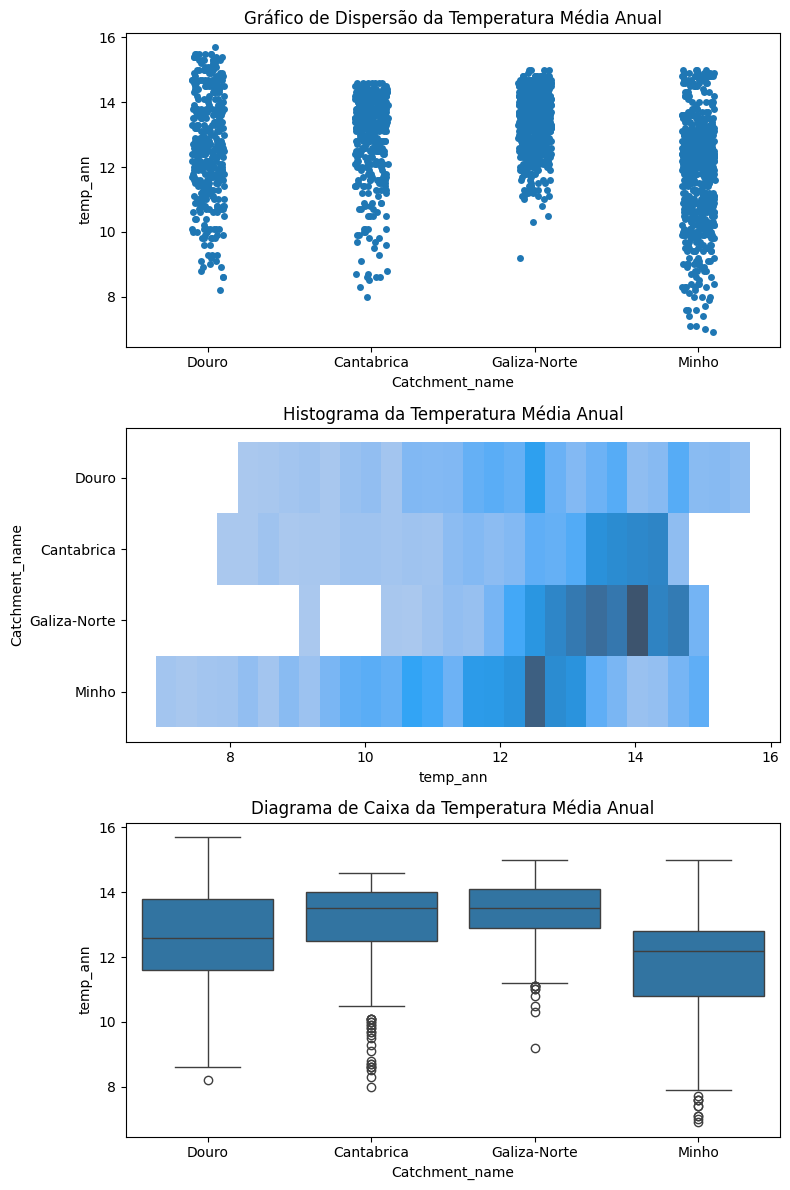

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

catchments = ['Minho', 'Douro', 'Galiza-Norte', "Cantabrica"]
df_selected = df[df['Catchment_name'].isin(catchments)]

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Gráfico 1: Gráfico de dispersão (Strip plot)
sns.stripplot(x=df_selected['Catchment_name'], y=df_selected['temp_ann'], ax=axs[0])
axs[0].set_title('Gráfico de Dispersão da Temperatura Média Anual')

# Gráfico 2: Histograma
sns.histplot(x=df_selected['temp_ann'], y=df_selected['Catchment_name'], ax=axs[1], kde=True)
axs[1].set_title('Histograma da Temperatura Média Anual')

# Gráfico 3: Box plot
sns.boxplot(x=df_selected['Catchment_name'], y=df_selected['temp_ann'], ax=axs[2])
axs[2].set_title('Diagrama de Caixa da Temperatura Média Anual')

plt.tight_layout()
plt.show()
